# Neural Network Classification with Pytorch
Classification is a problem of predicting whether something is one thinf or another (There can be multiple things as options)

### Make classification data and get it ready

In [1]:
import sklearn

In [2]:
from  sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"First five samples of X:\n{X[:5]}")
print(f"First five samples of y:\n{y[:5]}")

First five samples of X:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y:
[1 1 1 1 0]


In [5]:
# Make DataFrame of Circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


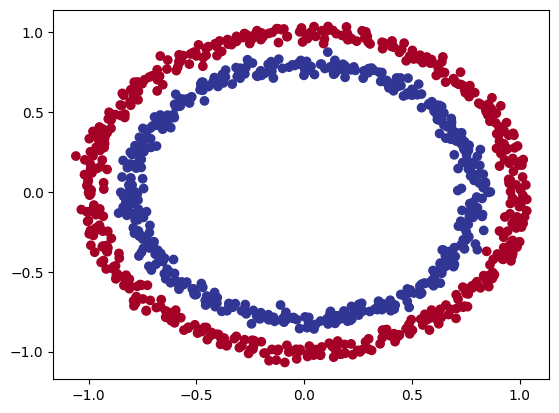

In [6]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)

### Check input and output shapes

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

In [8]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample}, and y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape}, and y: {y_sample.shape})")

Values for one sample of X: [0.75424625 0.23148074], and y: 1
Shapes for one sample of X: (2,), and y: ())


### Converting the data into Tensors

In [10]:
import torch
torch.__version__

'2.1.1+cu121'

In [11]:
X = torch.from_numpy(X).type(torch.float)

In [12]:
y = torch.from_numpy(y).type(torch.float)

In [13]:
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [14]:
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

### Spliting the data into train and test sets

In [15]:
# Split data into training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% would be test data and 80% training data
                                                    random_state=42)

In [16]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building the model
Let's build a model to classify our blue and red dots.

To do so, we want to:
1. Setup device agnostice code so our code runs on an accelerator (GPU) if available
2. Construct a model (by subclassing `nn.module`)
3. Define a loss function and an optimizer
4. Create a training and testing loop

In [17]:
# Import Pytorch and nn
import torch
from torch import nn

#  Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, its time to create a model that:
1. Subclasses `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Creates 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` methods that outlines the forward pass (or forward computations) of the model
4. Instantiates an instance of our model class and send it to the target `device`

In [19]:
# 1. Construct a model that subclasses nn.Module

class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of of handling the shapes of our data
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 input features and upscale to 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from the previous layer and outputs a single feature

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0 

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [20]:
device

'cuda'

In [21]:
next(model_0.parameters()).device

device(type='cuda', index=0)

Next lets replicate the above model, since it is quite a simple model, using `nn.Sequential`

In [22]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

Actually, we can also achieve the same by writing the `nn.Sequential` block inside of the our model class. Like the code below:
```python
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # # 2. Create 2 nn.Linear layers capable of of handling the shapes of our data
        # self.layer_1 = nn.Linear(in_features=2, out_features=5) # Takes in 2 input features and upscale to 5 features
        # self.layer_2 = nn.Linear(in_features=5, out_features=1) # Takes in 5 features from the previous layer and outputs a single feature

        self.two_linear_layers = nn.Sequential(
            nn.Linear(in_features=2, out_features=5),
            nn.Linear(in_features=5, out_features=1),
        )

    # 3. Define a forward() method that outlines the forward pass
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        # return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output
        return self.two_linear_layers(x)
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0 
```


In [23]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4397, -0.0043],
                      [ 0.0718,  0.0933],
                      [ 0.4543,  0.0018],
                      [ 0.2348,  0.3848],
                      [-0.4129, -0.3775]], device='cuda:0')),
             ('0.bias',
              tensor([ 1.1280e-02, -1.1159e-01,  6.0492e-01, -1.2568e-04,  4.5173e-01],
                     device='cuda:0')),
             ('1.weight',
              tensor([[ 0.3824,  0.4231, -0.3675,  0.4014, -0.0525]], device='cuda:0')),
             ('1.bias', tensor([-0.1003], device='cuda:0'))])

In [24]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [25]:
X_test.device

device(type='cpu')

In [26]:
# Make Predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, Shape:{untrained_preds.shape}")
print(f"Length of Test samples: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions:\n {untrained_preds[:10]}")
print(f"\nFirst 10 predictions rounded off to make values binary (0 or 1):\n {torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n {y_test[:10]}")

Length of predictions: 200, Shape:torch.Size([200, 1])
Length of Test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions:
 tensor([[-0.3003],
        [-0.1841],
        [-0.5595],
        [-0.2271],
        [-0.4872],
        [-0.4168],
        [-0.1468],
        [-0.2011],
        [-0.5622],
        [-0.1755]], device='cuda:0')

First 10 predictions rounded off to make values binary (0 or 1):
 tensor([[-0.],
        [-0.],
        [-1.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-1.],
        [-0.]], device='cuda:0')

First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [27]:
X_test[:10], y_test[:10]

(tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

### 2.1 Setup loss function and optimizer

Which loss function or optimzer should you use?
Again... This is problem specific
* For example, for regression you might want MAE or MSE (mean absolute error or mean squared error).
* For classification you might want binary cross entropy or categorical cross entropy (cross entropy).
* **Reminder:** Loss function measures how *wrong* your predictions are...
* And for optimizers, tow of the most common and useful are SGD and ADAM, However, PyTorch has many built-in options.
* For the loss function, we are going to use `torch.nn.BCEWithLogitsLoss()`

Logits, in context of Deep Learning, the logits layer means the layer that feeds into the softmax (or other such normalization). 

The output of the softmax are the probabalities for the classification task and its input is the logits layer.

In [28]:
# Setup loss function and optimizer

# loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [29]:
# Calculate accuracy - out of 100 examples, what percentage deos our model get right?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## Train Model
To train our model, we need to build a training loop with the following steps:

1. Forward Pass
2. Calculate the loss
3. Optimzer Zero Grad
4. Loss Backward (Backporpagation)
5. Optimzer Step (Gradient Descent)

### Going form raw logits -> Prediction Probabilities -> Prediction labels

Our Model outputs are going to be raw **logits**.
<!-- **Logits** are the raw outputs of our model. -->

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation functions (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert out prediction probabilities to **prediction labels** by either rounding them or taking the `argmax()`.

In [30]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3003],
        [-0.1841],
        [-0.5595],
        [-0.2271],
        [-0.4872]], device='cuda:0')

In [31]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [32]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4255],
        [0.4541],
        [0.3637],
        [0.4435],
        [0.3806]], device='cuda:0')


For our prediction probability values, we need to perform a range style rounding on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [33]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 0., 0., 0.], device='cuda:0')

In [34]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### Building the Training and Testing Loop

In [35]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put the data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labels

    # 2. Calculate the loss/accuracy

    # loss = loss_fn(torch.sigmoid(y_logits), # nn.BCELoss expects prediciton probabilities as input
    #                y_train)

    loss = loss_fn(y_logits, # nn.BCEWithLogitsLoss expects raw logits as input
                   y_train)
    
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward (backpropagation)
    loss.backward()

    # 5. Optimizer step (gradient descent)
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
        # 3. Print out whats happening
        if epoch % 10 == 0:
            print(f"Epoch:{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch:0 | Loss: 0.71409, Acc: 50.00% | Test Loss: 0.71801, Test acc: 50.00%
Epoch:10 | Loss: 0.70079, Acc: 47.75% | Test Loss: 0.70595, Test acc: 43.50%
Epoch:20 | Loss: 0.69623, Acc: 45.88% | Test Loss: 0.70153, Test acc: 48.00%
Epoch:30 | Loss: 0.69456, Acc: 49.00% | Test Loss: 0.69966, Test acc: 46.50%


Epoch:40 | Loss: 0.69389, Acc: 49.50% | Test Loss: 0.69868, Test acc: 47.50%
Epoch:50 | Loss: 0.69358, Acc: 50.25% | Test Loss: 0.69806, Test acc: 46.00%
Epoch:60 | Loss: 0.69341, Acc: 50.50% | Test Loss: 0.69760, Test acc: 46.50%
Epoch:70 | Loss: 0.69330, Acc: 50.25% | Test Loss: 0.69723, Test acc: 46.50%
Epoch:80 | Loss: 0.69323, Acc: 50.88% | Test Loss: 0.69691, Test acc: 45.50%
Epoch:90 | Loss: 0.69317, Acc: 50.88% | Test Loss: 0.69665, Test acc: 45.50%


## Make predictions and evaluate the model

From the metrics it looks like our model isnt learning anything.....

So to inspect it lets make some predictions and make them visual!

To do so, were going to import a function called `plot_decision_boundary()`

In [36]:
import requests
from pathlib import Path

# Download helper functions from learn Pytorch repo (if its not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downlaoding helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/MuhammedUmerNazir/pytorch_code_snippets/main/helper_functions.py")

    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary



helper_functions.py already exists, skipping download


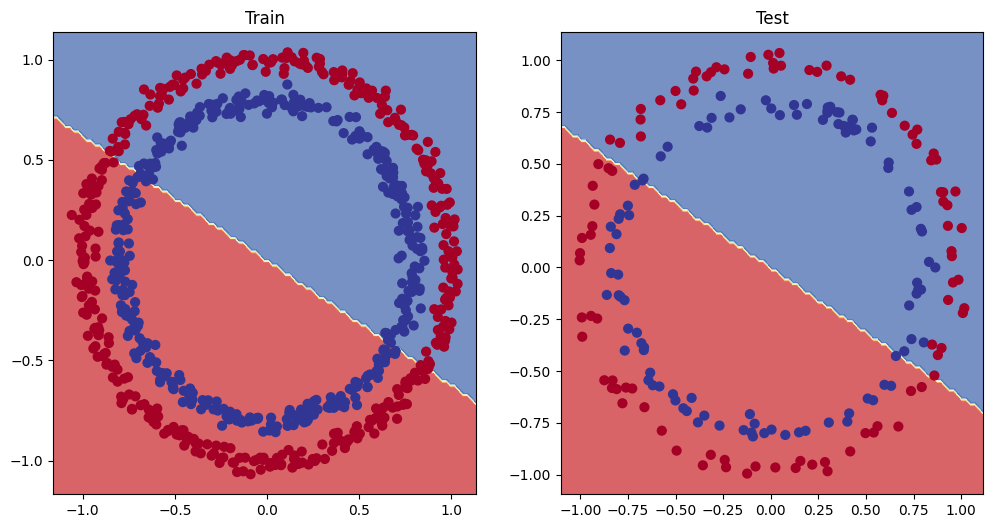

In [37]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## 5. Improving a model (from model perspective)
* Add more layers - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation functions
* Change the learning rate
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And because the these options are all values we (as Machine Learning Engineers and Data Scientists) can change, they are called **Hyperparameters**

Let's try and improve our model by:

* Adding more hidden units: 5->10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs: 100 -> 1000

In [39]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
    
    def forward(self, x):
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        return self.layer_3(self.layer_2(self.layer_1(x))) # This way of writing opertations leverages speed ups where possible behind the scenes.
    
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [42]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)

In [45]:
# Write a training and evaluation loop for model_1

# Setting the manual seeds to induce reproducibility in our outputs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Setting epochs = 100 to train for longer
epochs = 1000

# Putting data on the target device, writng the device agnostic code
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training and testing loop
for epoch in range(epochs):
    # Training
    model_1.train()

    # 1. Do the forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

    # 2. Calculate the loss/ acc
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                       y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards (Back Propagation)
    loss.backward()

    # 5. Optimzer Step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():

        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the loss
        test_loss = loss_fn(test_logits,
                            y_test)
        
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Print out whats happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}% ")

Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test Loss: 0.69261, Test Accuracy: 51.00% 
Epoch: 100 | Loss: 0.69305, Accuracy: 50.38% | Test Loss: 0.69379, Test Accuracy: 48.00% 
Epoch: 200 | Loss: 0.69299, Accuracy: 51.12% | Test Loss: 0.69437, Test Accuracy: 46.00% 
Epoch: 300 | Loss: 0.69298, Accuracy: 51.62% | Test Loss: 0.69458, Test Accuracy: 45.00% 
Epoch: 400 | Loss: 0.69298, Accuracy: 51.12% | Test Loss: 0.69465, Test Accuracy: 46.00% 
Epoch: 500 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69467, Test Accuracy: 46.00% 
Epoch: 600 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00% 
Epoch: 700 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00% 
Epoch: 800 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00% 
Epoch: 900 | Loss: 0.69298, Accuracy: 51.00% | Test Loss: 0.69468, Test Accuracy: 46.00% 


In [46]:
next(model_1.parameters()).device

device(type='cuda', index=0)

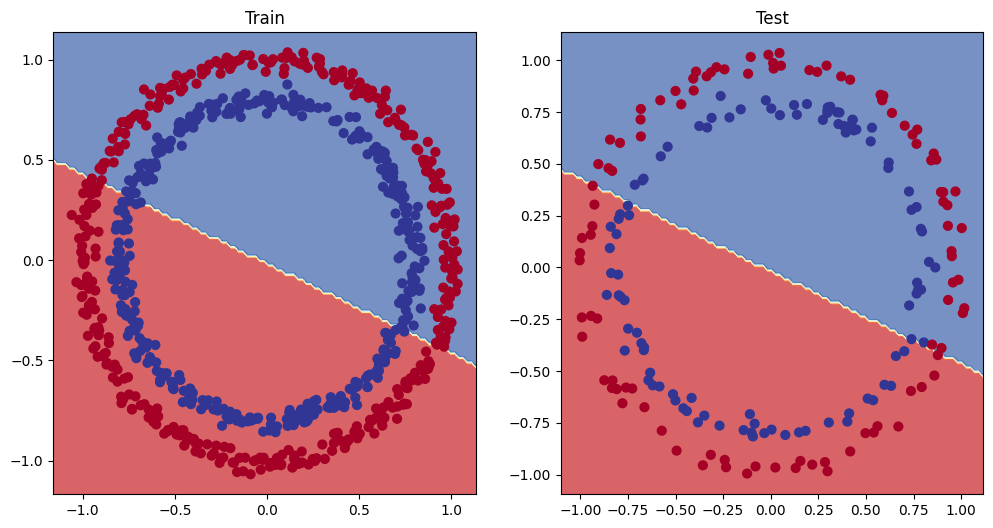

In [47]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if our model can fit a straight line
One way to troubleshoot to alrger problem is to test out a smaller problem.

In [48]:
#  Creat some linear data
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.01


# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # Linear regression formula (without epsilon)

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [49]:
# Create train and test splits
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

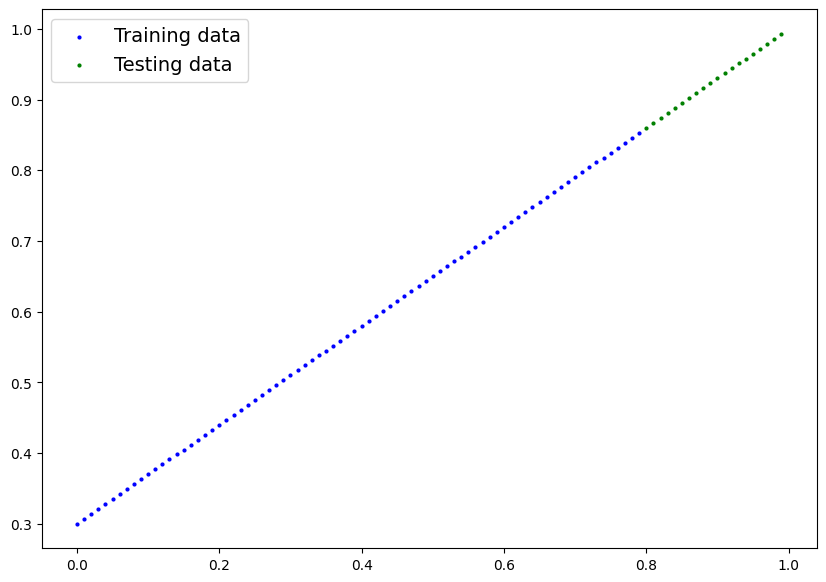

In [50]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

In [52]:
X_train_regression[:10], y_train_regression[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

### Adjusting `model_1` to Fit a Straight Line

In [53]:
# Same architecture as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [56]:
# Loss and Optimizer
loss_fn = nn.L1Loss() # MAE loss with regression data
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [57]:
# Train the model
# Set a manual seed
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Put the data on the target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

# Training loop
for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    # Print out whats happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.06466 | Test Loss: 0.12597
Epoch: 100 | Loss: 0.00743 | Test Loss: 0.00093
Epoch: 200 | Loss: 0.00621 | Test Loss: 0.00123
Epoch: 300 | Loss: 0.00619 | Test Loss: 0.00116
Epoch: 400 | Loss: 0.00617 | Test Loss: 0.00094
Epoch: 500 | Loss: 0.00646 | Test Loss: 0.00138
Epoch: 600 | Loss: 0.00614 | Test Loss: 0.00110
Epoch: 700 | Loss: 0.00612 | Test Loss: 0.00103
Epoch: 800 | Loss: 0.00641 | Test Loss: 0.00149
Epoch: 900 | Loss: 0.00639 | Test Loss: 0.00118


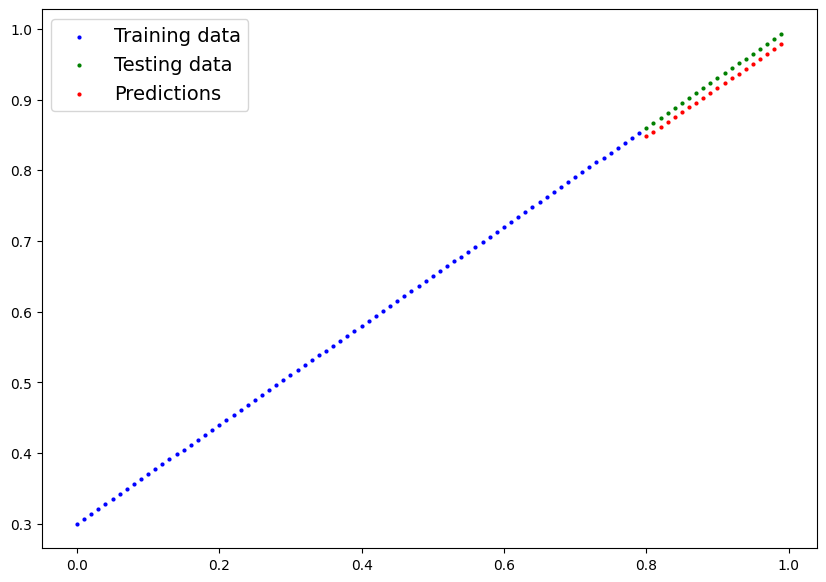

In [60]:
# Turn on evaluation mode
model_2.eval()

# Make predictions(inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(), 
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

The above results suggest that our model does have the ability to learn, the only issue it seems to be is that the circles data that we are dealing with is non linear data whereas our model only has the ability to learn linear functions.

### The Missing Piece: Non Linearity
"What pattens could you draw if you were given an infinite amount of straight and non straight lines?"

Or in Machine Learning terms, an infinite number of linear and non linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

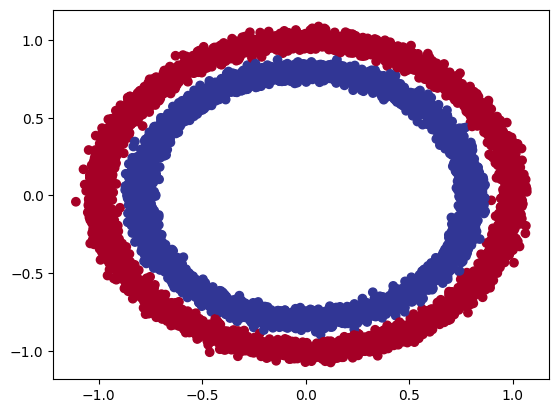

In [61]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 10000
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [62]:
# Convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.2029, -1.0081],
         [-0.1717, -0.9750],
         [ 0.5565,  0.5440],
         [ 0.1194, -1.0153],
         [ 0.3515,  0.7450]]),
 tensor([0., 0., 1., 0., 1.]))

### Building a model with non-linearity
* Linear = straight line
* Non-linear = non-straight line

Artificial Neural Networks are a combination of linear (straight) and non-linear (non-straight) functions
which are potentially able to find patterns in the data.

In [64]:
# Build a model with non-linear activation functions

from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # ReLU is a non-linear activation function

    def forward(self, x):
        # Where should we put our non-linear activation functions?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [65]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [67]:
# Random Seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Loop through data
epochs = 1000

for epoch in range(epochs):
    #Training
    model_3.train()

    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> pred labels

    # 2. Calculate the Loss
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)

    acc = accuracy_fn(y_true=y_train, 
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss Backwards
    loss.backward()

    # 5. Optimizer Step
    optimizer.step()

    # Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # 2. Calculate the Loss
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    # Print out whats happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.55238, Accuracy: 87.60% | Test Loss: 0.55125, Test Accuracy: 87.75%
Epoch: 100 | Loss: 0.46094, Accuracy: 93.79% | Test Loss: 0.45969, Test Accuracy: 93.95%
Epoch: 200 | Loss: 0.34563, Accuracy: 97.82% | Test Loss: 0.34558, Test Accuracy: 98.10%
Epoch: 300 | Loss: 0.23637, Accuracy: 99.38% | Test Loss: 0.23830, Test Accuracy: 99.20%
Epoch: 400 | Loss: 0.16305, Accuracy: 99.58% | Test Loss: 0.16590, Test Accuracy: 99.45%
Epoch: 500 | Loss: 0.11839, Accuracy: 99.61% | Test Loss: 0.12152, Test Accuracy: 99.45%
Epoch: 600 | Loss: 0.09070, Accuracy: 99.65% | Test Loss: 0.09394, Test Accuracy: 99.60%
Epoch: 700 | Loss: 0.07270, Accuracy: 99.69% | Test Loss: 0.07596, Test Accuracy: 99.60%
Epoch: 800 | Loss: 0.06033, Accuracy: 99.71% | Test Loss: 0.06353, Test Accuracy: 99.60%
Epoch: 900 | Loss: 0.05153, Accuracy: 99.75% | Test Loss: 0.05456, Test Accuracy: 99.70%


In [68]:
model_3.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.9144,  1.5519],
                      [-0.5537,  1.8759],
                      [-0.1549,  0.1427],
                      [-2.3713, -0.0925],
                      [ 0.5996, -2.3501],
                      [ 1.2499,  0.1816],
                      [ 1.7382, -0.0787],
                      [ 0.3410, -0.0998],
                      [ 0.7859,  0.7614],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.2637, -0.8812, -0.2872, -0.4963, -0.4564, -0.5447, -0.8663, -0.4252,
                      -0.1921, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0334, -0.7193,  0.2441, -0.3613, -0.4185, -0.0544, -0.2622,  0.2555,
                       -0.1123, -0.0997],
                      [ 1.5699,  1.8082,  0.1331,  2.1418,  1.9989,  1.0105,  1.6396,  0.0566,
                        0.9341, -0.1927],
                      [-0.3130, -0.124

### Evaluating a model trained with non-linear activation functions

In [69]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.], device='cuda:0'),
 tensor([1., 1., 0., 1., 0., 1., 1., 1., 1., 1.], device='cuda:0'))

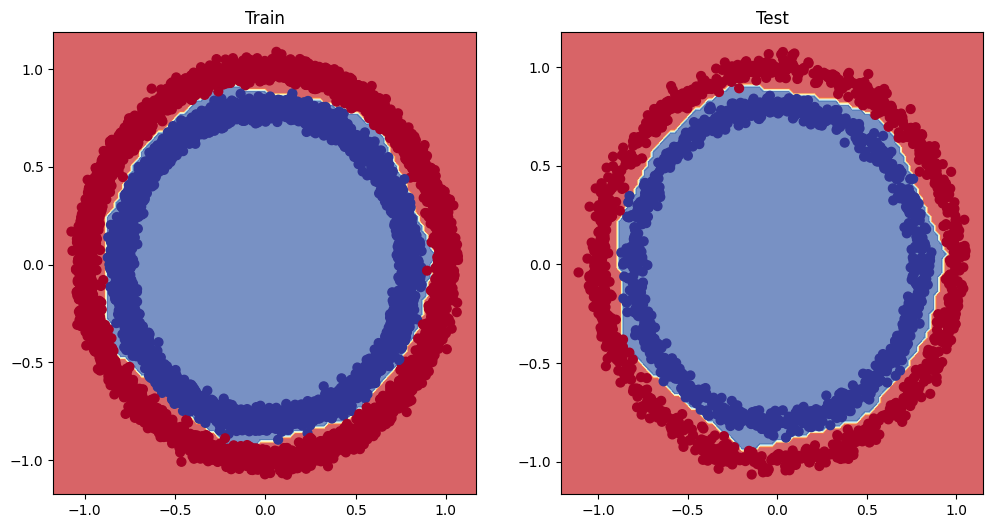

In [70]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

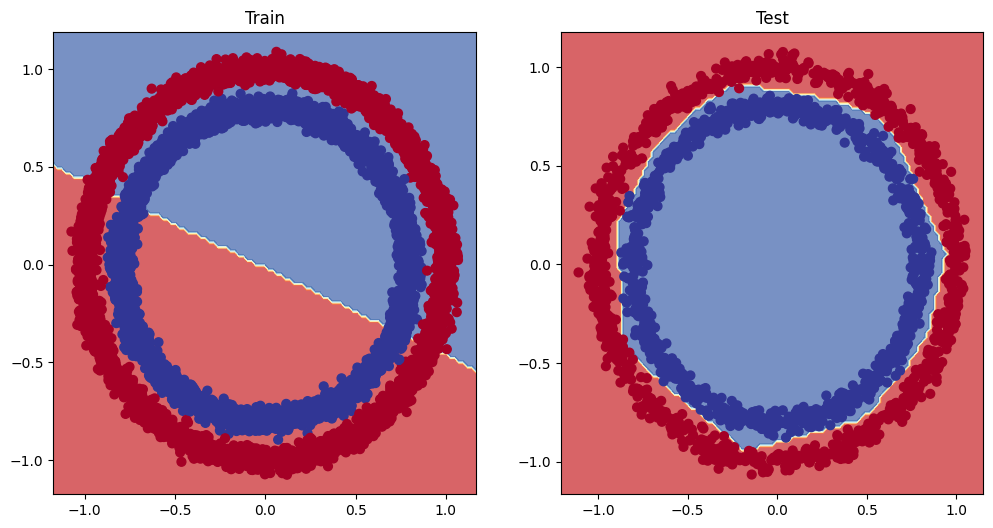

In [71]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

### Replicating non-linear activation functions
We provide neural networks tools to discover patterns in data. 

These tools are Linear and Non-Linear functions

In [75]:
# Create a tensor
# A = torch.arange(-10, 10, 1, dtype=torch.float32)
A = torch.arange(-10, 10, 1.0)
A.dtype

torch.float32

In [76]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

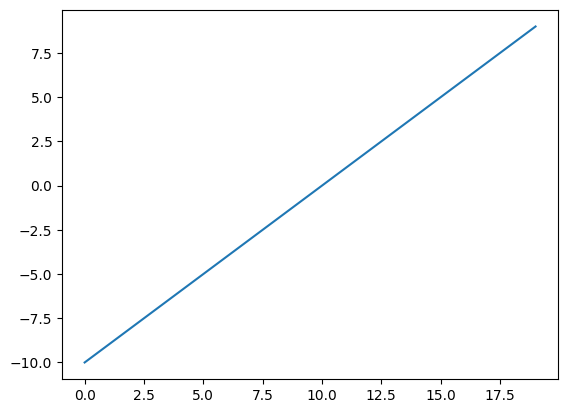

In [77]:
# Visualize the tensor
plt.plot(A)

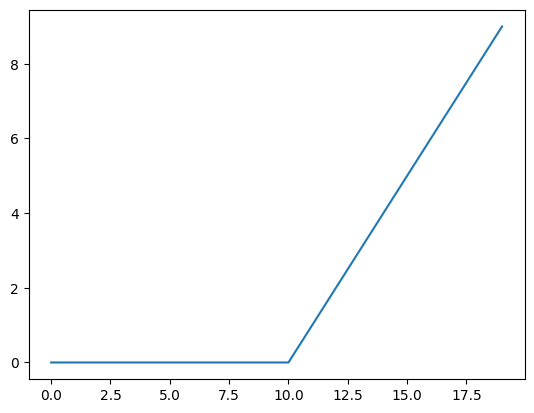

In [78]:
plt.plot(torch.relu(A))

In [79]:
def relu(x: torch.Tensor) -> torch.Tensor:
    return torch.maximum(torch.tensor(0), x) # inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

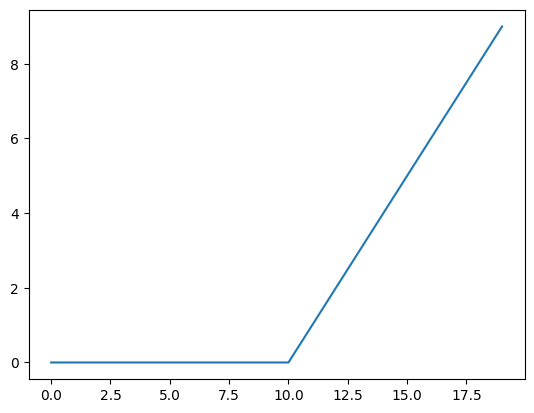

In [80]:
# Plot ReLU activation function
plt.plot(relu(A))

In [81]:
# Now lets create a custom sigmoid function
def sigmoid(x:torch.Tensor) -> torch.Tensor:
    return 1/(1 + torch.exp(-x))

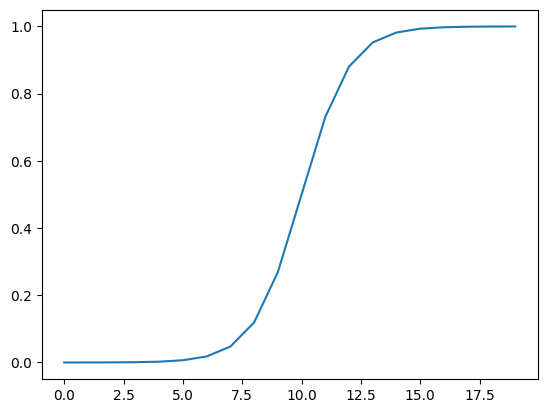

In [82]:
plt.plot(torch.sigmoid(A))

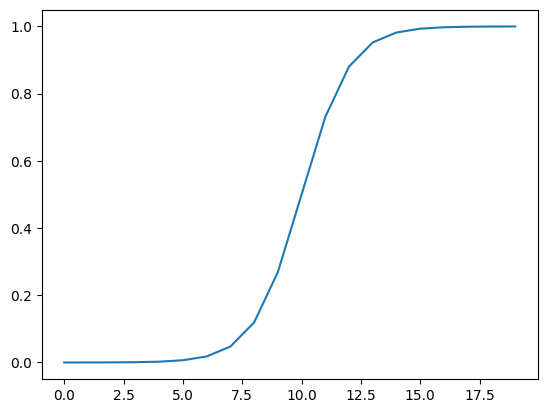

In [84]:
plt.plot(sigmoid(A))

## Putting it all together with a muli-class classification problem
* Binary Classification = One thing or another (cat vs dog, spam vs non-spam, fraud vs not-fraud)
* Multi-Class classification = more than one thing or another (cat vs dog vs chicken).

#### Creating a toy multi-class dataset

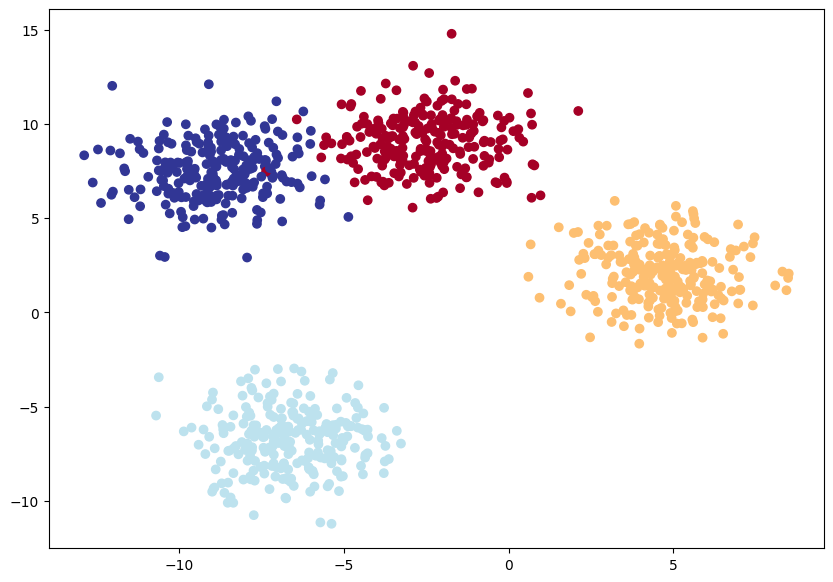

In [87]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5, # give the clusters a little shake up
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# 3. Split into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size=0.2,
                                                                        random_state=RANDOM_SEED)

# 4. Plot data (visualize, visualize, visualize)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu )

#### Building a multi-class classification model in PyTorch

In [88]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [95]:
# Build a multi-class classification model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes a multi-class classification model.
        
        Args:
        input_features (int): Number of input features to the model.
        output_features (int): Number of output features (number of output classes).
        hidden_units (int): Number of hidden units between layers, default 8

        Returns: Model object
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_features)
        )

    def forward(self, x):
        return self.linear_layer_stack(x)
    
# Create an instance of BlobModel and send it to the target device.
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [90]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1., 0., 2., 2., 0.]))

In [91]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

#### Create a loss function and an optimizer for a multi-class classification model

In [96]:
# Create a loss function for a multi-class classification
loss_fn = nn.CrossEntropyLoss()

# Create an optimizer for multi-class classification
optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1) # learning rate is a hyperparameter you can change

In [ ]:
### 